In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import numpy as np

In [2]:
df = pd.read_csv("directory.csv")
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
df.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [41]:
df.describe()

,Longitude,Latitude
count,25599.000000,25599.000000
mean,-27.872234,34.793016
std,96.844046,13.342332
min,-159.460000,-46.410000
25%,-104.665000,31.240000
50%,-79.350000,36.750000
75%,100.630000,41.570000
max,176.920000,64.850000


In [6]:
df.isnull().sum()/len(df)

Brand             0.000000
Store Number      0.000000
Store Name        0.000000
Ownership Type    0.000000
Street Address    0.000078
City              0.000586
State/Province    0.000000
Country           0.000000
Postcode          0.059453
Phone Number      0.268008
Timezone          0.000000
Longitude         0.000039
Latitude          0.000039
dtype: float64

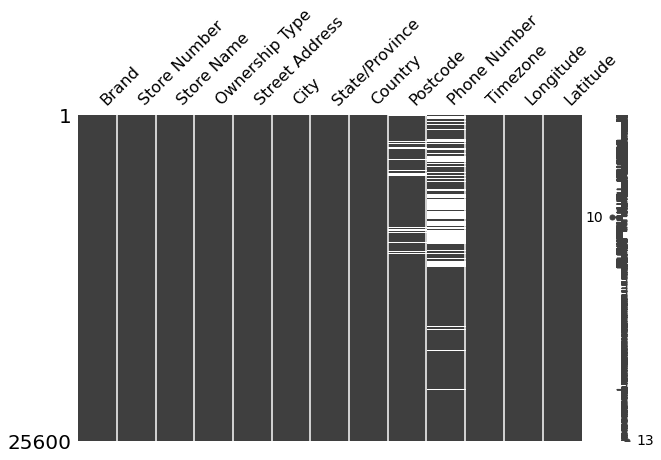

In [74]:
missingno.matrix(df,figsize=(10,6))

In [70]:
def value_counts(data, column=None,criteria = None):
  if criteria == "all columns":
    for col in data.columns:
      print(col,'\n',data[col].value_counts(),'\n\n')
  else:
    print(data[column].value_counts())

## Data Cleaning

In [75]:
df.isnull().sum()/len(df)

Brand             0.000000
Store Number      0.000000
Store Name        0.000000
Ownership Type    0.000000
Street Address    0.000078
City              0.000586
State/Province    0.000000
Country           0.000000
Postcode          0.059453
Phone Number      0.268008
Timezone          0.000000
Longitude         0.000039
Latitude          0.000039
dtype: float64

So we see from above that a small percentage of data having missing values. Is it so, lets investigate

In [76]:
value_counts(data = df,criteria="all columns")

Brand 
 Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64 


Store Number 
 19773-160973    2
23189-225004    1
7760-50439      1
17033-178906    1
49034-262444    1
               ..
48408-260731    1
75225-79983     1
34214-27367     1
7856-70820      1
23693-227588    1
Name: Store Number, Length: 25599, dtype: int64 


Store Name 
 Starbucks                         224
SPA                                 6
Mabohai Shopping Mall               2
Magnolia                            2
Division del Norte                  2
                                 ... 
Chevron USA Headquarters Lobby      1
Soonchunhyang Gate                  1
Renai Yanji                         1
Randol Mill & Fielder               1
成都万象城店                              1
Name: Store Name, Length: 25364, dtype: int64 


Ownership Type 
 Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise

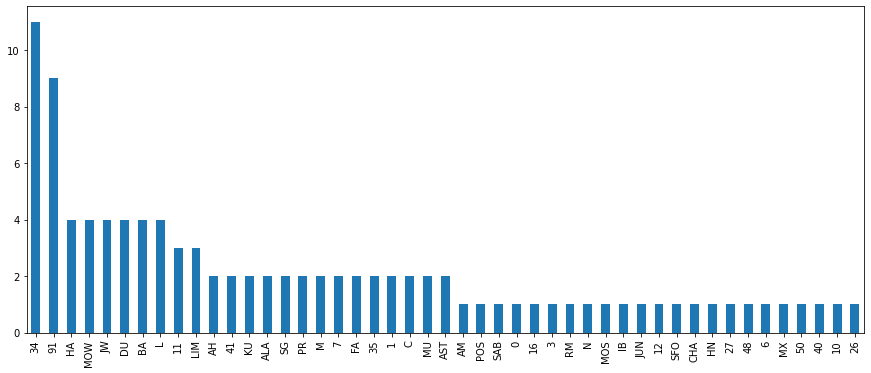

In [94]:
#Postcode
df[df['Postcode']== '0']["State/Province"].value_counts().plot.bar(figsize = (15,6))

From the above plot we see many of the State/Provinces has got zip code as 0 whereas the the minimum length of zipcode is 5. In this case I'll try to filter those zip codes which doesn't fall in range 5-10 character length

In [110]:
df['Postcode'] = df['Postcode'].fillna('0')
df['Filtered_Postcode'] = df['Postcode'].apply(lambda x: x if len(x) >= 5 and len(x) <= 10 else '0')

In [111]:
df['Filtered_Postcode'].value_counts()/df.shape[0]

0            0.116328
310000       0.003438
518000       0.002734
610000       0.002500
215000       0.002500
               ...   
342434151    0.000039
802023229    0.000039
331263105    0.000039
774298323    0.000039
90069        0.000039
Name: Filtered_Postcode, Length: 18211, dtype: float64

We see from above that almost 0.12 % of the zip codes are either invalid or cotains missing values. Since, the percentage of these errored zip code is very less so I'll remove these zip codes from the data

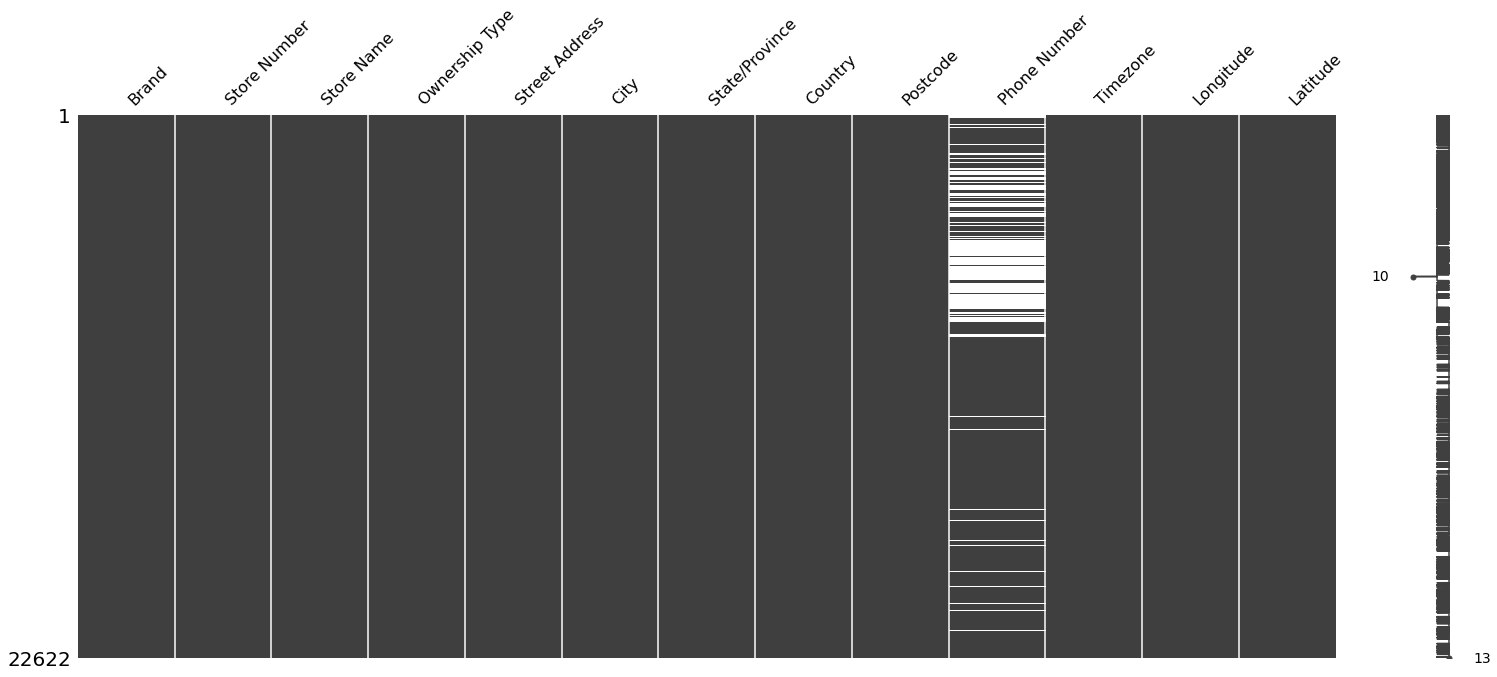

In [202]:
df_new = df[df['Filtered_Postcode'] != '0'].drop('Filtered_Postcode', axis =1)
missingno.matrix(df_new)

In [203]:
df_new.reset_index(inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22622 entries, 0 to 22621
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           22622 non-null  int64  
 1   Brand           22622 non-null  object 
 2   Store Number    22622 non-null  object 
 3   Store Name      22622 non-null  object 
 4   Ownership Type  22622 non-null  object 
 5   Street Address  22620 non-null  object 
 6   City            22622 non-null  object 
 7   State/Province  22622 non-null  object 
 8   Country         22622 non-null  object 
 9   Postcode        22622 non-null  object 
 10  Phone Number    17312 non-null  object 
 11  Timezone        22622 non-null  object 
 12  Longitude       22621 non-null  float64
 13  Latitude        22621 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.4+ MB


The data looks better now. We still see that one latitude and logitude is still missing

In [204]:
df_new.fillna(np.nan, inplace= True)
print(df_new.loc[df_new.notna().any(axis =1)].shape[0])
print(df_new.loc[df_new.notnull().any(axis =1)].shape[0])

22622
22622


In [205]:
df_new.Latitude.shape

(22622,)

For the missing values on the 'Phone Number' column,we'll just replace the NaN values with 'Not avaiable'

In [206]:
df_new['Phone Number'].fillna('Not avaiable', inplace = True)

In [210]:
df_new.drop('index',axis = 1,inplace=True)

In [211]:
df_new.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,24932-239347,Al Mamoura,Licensed,"Al Mamoura, Al Muroor District",Abu Dhabi,AZ,AE,51133,Not avaiable,GMT+04:00 Asia/Dubai,54.39,24.46
2,Starbucks,24931-239348,Raha Garden,Licensed,Raha Gardens Plaza,Abu Dhabi,AZ,AE,51133,Not avaiable,GMT+04:00 Asia/Dubai,54.37,24.47
3,Starbucks,27072-246650,Reel Cinema,Licensed,"Reel Cinema, Dubai Mall, Second Floor",Dubai,DU,AE,113444,Not avaiable,GMT+04:00 Asia/Muscat,55.60,24.78
4,Starbucks,25406-240945,Bin Sougat,Licensed,"Al Khawaneej Road, Al Rashidiya",Dubai,DU,AE,10170,Not avaiable,GMT+04:00 Asia/Dubai,55.40,25.23


In [212]:
df.to_csv('cleaned data.csv', index= False)